# Modeling - Simple Regression with feature selection and regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from linearmodels.panel import PanelOLS
import os
import seaborn as sns
import statsmodels.api as sm
from itertools import product
from sklearn.linear_model import ElasticNet
import pickle
current_dir = os.getcwd()

In [2]:
df_test = pd.read_pickle("feature_engineering_test_dataset.pkl")
display(df_test.head(3))
print("Shape: ", df_test.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,dummy_south_dakota,dummy_tennessee,dummy_texas,dummy_utah,dummy_vermont,dummy_virginia,dummy_washington,dummy_west_virginia,dummy_wisconsin,dummy_wyoming
0,2021-02-09,10001,36.782852,15.779060,7.452131,71.744309,63.479295,31.768168,60.557307,40.272843,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-10,10001,33.319952,12.837715,2.041177,72.171535,65.314007,28.528320,63.845535,38.435611,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-11,10001,36.710308,14.203521,2.125673,68.555617,64.170146,31.020100,64.243291,39.718812,...,0,0,0,0,0,0,0,0,0,0


Shape:  (1560, 105)


In [3]:
# Feature Selection: 
# Drop smoothed_wvaccine_likely_who since we already have smoothed_wvaccine_likely_govt_health
# Drop smoothed_wwearing_mask since we already have smoothed_wothers_masked 
# Drop smoothed_wcovid_vaccinated_or_accept since it states that espondents who either have already received a COVID vaccine or would definitely or probably choose to get vaccinated
list_drop_cols = ['smoothed_wvaccine_likely_who','smoothed_wwearing_mask','smoothed_wcovid_vaccinated_or_accept'
                  ,'smoothed_wvaccine_likely_who_rolling_mean_3','smoothed_wwearing_mask_rolling_mean_3','smoothed_wcovid_vaccinated_or_accept_rolling_mean_3'
                  ,'smoothed_wvaccine_likely_who_lag_3','smoothed_wwearing_mask_lag_3','smoothed_wcovid_vaccinated_or_accept_lag_3'
                  ]

In [4]:
df_test = df_test.drop(columns = list_drop_cols)
print("Shape: ", df_test.shape)

Shape:  (1560, 96)


In [5]:
target_var = 'smoothed_wcovid_vaccinated'
list_features = [col for col in df_test.columns if col not in ["time_value",'geo_value','state','county_name'
                                                                ,'day_of_week','day','week_of_month','State'
                                                                ,'County Name','day_of_week'
                                                                ,target_var]]

In [6]:
list_scale = [col for col in list_features if 'dummy' not in col]
list_scale[-5:]

['smoothed_wcli_lag_3_x_smoothed_wwork_outside_home_1d',
 'smoothed_wothers_masked_x_smoothed_wcovid_vaccinated_or_accept',
 'smoothed_wtested_14d_x_smoothed_wvaccine_likely_govt_health',
 'smoothed_wcli_x_smoothed_wcovid_vaccinated_or_accept',
 'smoothed_wcovid_vaccinated_or_accept_x_smoothed_wvaccine_likely_friends']

In [7]:
with open(current_dir + r"\x_scaler_for_regression_model_experiment_01.pkl", "rb") as f:
    x_scaler = pickle.load(f)

X_valid_scaled = x_scaler.transform(df_test[list_scale])
df_test[list_scale] = X_valid_scaled

In [8]:
display(df_test.head(3))

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,...,dummy_south_dakota,dummy_tennessee,dummy_texas,dummy_utah,dummy_vermont,dummy_virginia,dummy_washington,dummy_west_virginia,dummy_wisconsin,dummy_wyoming
0,2021-02-09,10001,1.281442,0.485531,1.597445,-1.052375,0.011009,2.125614,1.459093,0.236316,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-10,10001,0.602901,-0.141677,-0.304548,-0.707632,-0.499930,2.894454,1.106412,0.651396,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-11,10001,1.267227,0.149566,-0.274847,-0.922564,-0.106964,2.987456,1.352739,0.551602,...,0,0,0,0,0,0,0,0,0,0


In [9]:
list_all_faeture = list_features.copy()
list_all_faeture.append("constant")
df_test['constant'] = 1.0

In [10]:
with open(current_dir + r"\regression_model_experiment_01.pkl", "rb") as f:
    best_model = pickle.load(f)

In [11]:
y_test_pred_scaler = best_model.predict(df_test[list_all_faeture])
y_test_pred_scaler

array([2.99918003, 2.98976409, 3.22083594, ..., 2.87367763, 3.29476332,
       3.23253481])

In [12]:
with open(current_dir + r"\y_scaler_for_regression_model_experiment_01.pkl", "rb") as f:
    y_scaler = pickle.load(f)
    
y_test_pred_original = y_scaler.inverse_transform(y_test_pred_scaler.reshape(-1, 1)).ravel()
y_test_pred_original

array([23.697111  , 23.65627084, 24.65850896, ..., 23.1527639 ,
       24.97915746, 24.70925102])

In [13]:
test_rmse = root_mean_squared_error(df_test[target_var], y_test_pred_original)

print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 1.6283


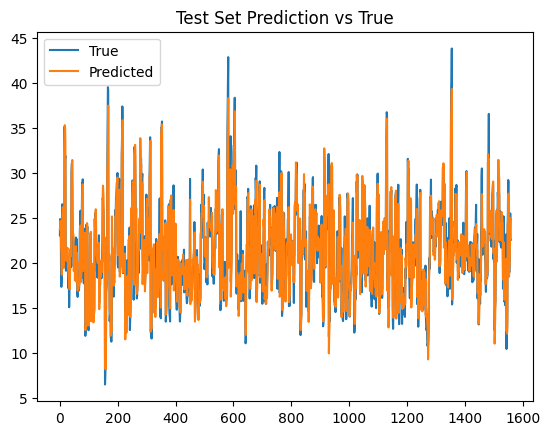

In [14]:
plt.plot(df_test[target_var], label="True")
plt.plot(y_test_pred_original, label="Predicted")
plt.title("Test Set Prediction vs True")
plt.legend()
plt.show()

Text(0.5, 1.0, 'OLS Error Distribution')

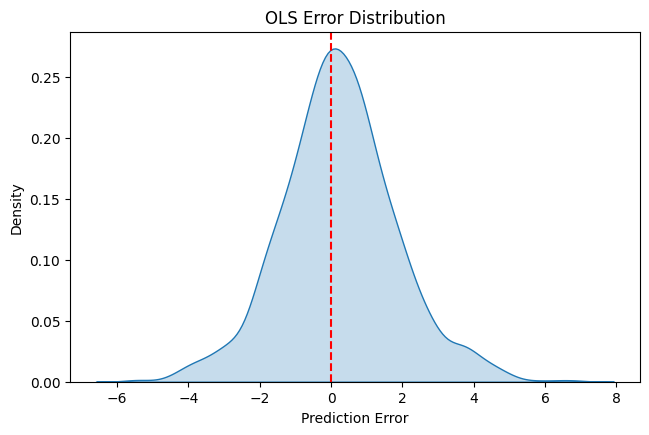

In [15]:
plt.figure(figsize=(25, 10))
plt.subplot(234)
sns.kdeplot(df_test[target_var] - y_test_pred_original, label='Residual', fill=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('OLS Error Distribution')